<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221031.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer analysis
* Iterator

In [2]:
import pandas as pd 
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns 

from datetime import datetime, date, time, timezone, timedelta
import os
import re

from functools import reduce
from collections import defaultdict

from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans

# Customer Analysis

In [3]:
os.listdir()

['.config',
 'sample-sales-data.csv',
 '1_orders_dataset.csv',
 '1_customers_dataset.csv',
 'online_retail_II.xlsx',
 'mock_sales_data.csv',
 '1_order_payments_dataset.csv',
 'match_result_test.csv',
 'sales.csv',
 'scanner_data.csv',
 'mall_customers.csv',
 'sales_data_with_stores.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'online_retail.xlsx',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'test.csv',
 'groceries.csv',
 'ecommerce-data.csv',
 'sales_vs_discount.csv',
 'sample_data']

In [4]:
df = pd.read_csv('mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.columns = [re.sub(' ', '_', re.sub(r' \(.+\)$', '', a)).lower() for a in df.columns]
df.head()

,customerid,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


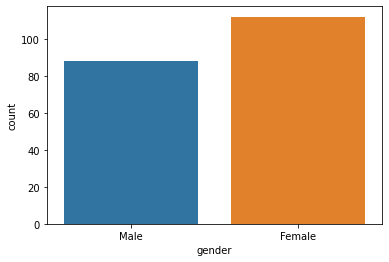

In [9]:
sns.countplot(data = df, x = 'gender')

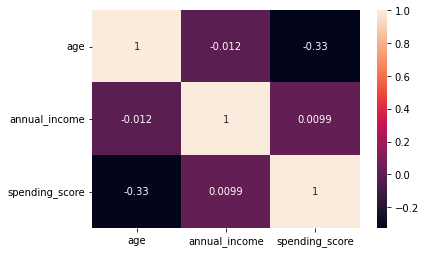

In [10]:
sns.heatmap(data = df.drop('customerid', axis = 1).corr(), annot = True)

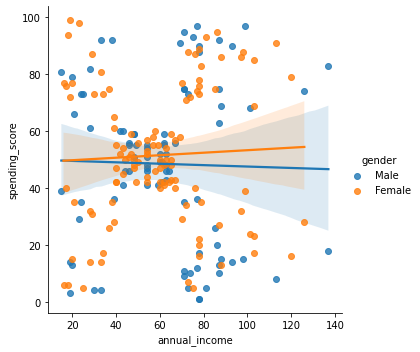

In [11]:
sns.lmplot(data = df, x = 'annual_income', y = 'spending_score', hue = 'gender')

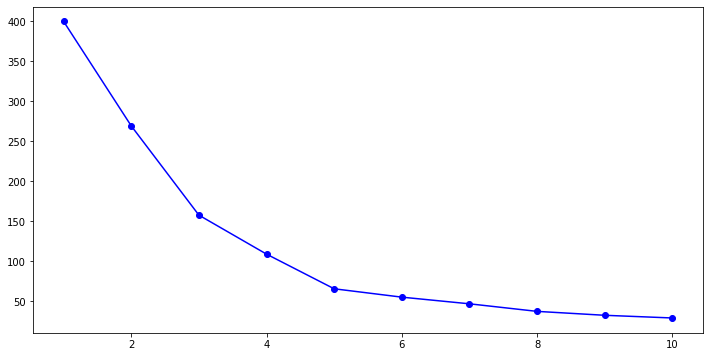

In [14]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df[['annual_income', 'spending_score']])

def get_score(df, n = 10) : 

  res = list()

  for i in range(1, n + 1) :
    km = KMeans(n_clusters = i, random_state = 10)
    km.fit(df)
    res.append(km.inertia_)
  
  plt.figure(figsize = [12, 6])
  plt.plot(range(1, n + 1), res, 'bo-')
  plt.show()

get_score(df_std)

In [15]:
km = KMeans(n_clusters = 5, random_state = 10)
km.fit(df_std)
df['flag'] = km.fit_predict(df_std).astype(str)
df.head()

,customerid,gender,age,annual_income,spending_score,flag
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


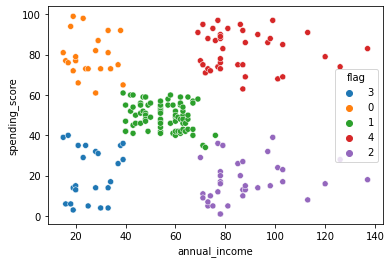

In [16]:
sns.scatterplot(data = df, x = 'annual_income', y = 'spending_score', hue = 'flag')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


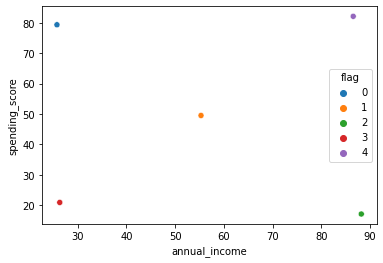

In [20]:
cnt = df.groupby(['flag'])['annual_income', 'spending_score'].mean().reset_index()
sns.scatterplot(data = cnt, x = 'annual_income', y = 'spending_score', hue = 'flag')

# Iterator

In [21]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [23]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}

In [24]:
a = list(range(1, 21))
a

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [29]:
reduce(lambda x, y : x + y, a)

210

In [30]:
reduce(lambda x, y : x * y, a)

2432902008176640000

In [31]:
reduce(lambda x, y : x ** y, a)

1

In [32]:
a = [
    {'name' : 'aaa', 'age' : 10},
    {'name' : 'bbb', 'age' : 20},
    {'name' : 'ccc', 'age' : 30},
    {'name' : 'ddd', 'age' : 40},
    {'name' : 'eee', 'age' : 50}
]
a

[{'name': 'aaa', 'age': 10},
 {'name': 'bbb', 'age': 20},
 {'name': 'ccc', 'age': 30},
 {'name': 'ddd', 'age': 40},
 {'name': 'eee', 'age': 50}]

In [35]:
reduce(lambda x, y : x + y['age'], a, 0)

150

In [36]:
reduce(lambda x, y : x + [y['age']], a, [])

[10, 20, 30, 40, 50]